In [1]:
#DBSCAN 聚类算法 Python 实现¶
import numpy as np
from sklearn import datasets
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
noisy_moons, _ = datasets.make_moons(n_samples=100, noise=.05, random_state=10) # 生成 100 个样本并添加噪声
noisy_moons[:5]

array([[ 0.2554364 ,  0.90420806],
       [ 0.55299636,  0.84445141],
       [-0.90343862,  0.39161309],
       [-0.62792219,  0.62502915],
       [ 0.60777269, -0.33777687]])

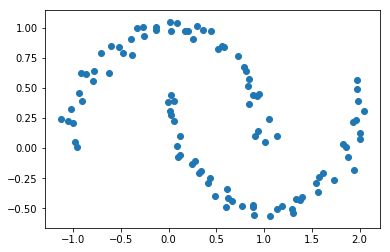

In [3]:
plt.scatter(noisy_moons[:,0], noisy_moons[:,1])

Text(0.5,0,'BIRCH')

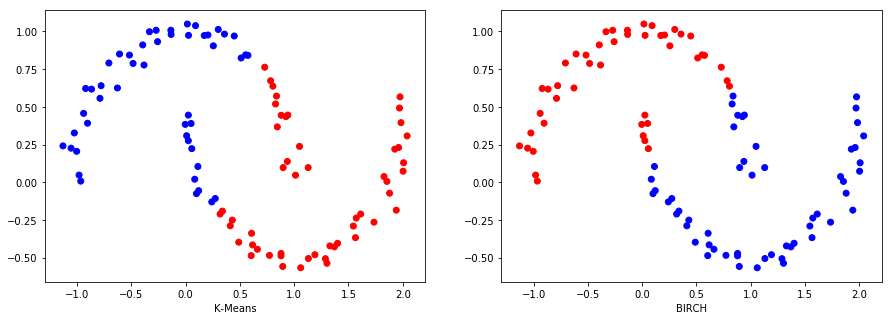

In [4]:
from sklearn.cluster import KMeans, Birch

kmeans_c = KMeans(n_clusters=2).fit_predict(noisy_moons)
birch_c = Birch(n_clusters=2).fit_predict(noisy_moons)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
axes[0].scatter(noisy_moons[:,0], noisy_moons[:,1], c=kmeans_c, cmap='bwr')
axes[1].scatter(noisy_moons[:,0], noisy_moons[:,1], c=birch_c, cmap='bwr')
axes[0].set_xlabel('K-Means')
axes[1].set_xlabel('BIRCH')

In [5]:
"""欧式距离
"""
def euclidean_distance(a, b):
    """
    参数:
    a -- 数组 a
    b -- 数组 b
    
    返回:
    dist -- a, b 间欧式距离
    """
    x = float(a[0]) - float(b[0])
    x = x * x
    y = float(a[1]) - float(b[1])
    y = y * y
    dist = round(np.sqrt(x + y), 2)
    return dist

In [6]:
"""找出数据集中距核心点 P 在 eps 范围内的邻近点
"""
def search_neighbors(D, P, eps):
    """
    参数:
    D -- 数据集（二维数组）
    P -- 核心点
    eps -- eps 邻域
    
    返回:
    neighbors -- 核心点在 eps 范围内的邻居
    """
    neighbors = []
    for Pn in range(0, len(D)):
        # 距离判断是否在 eps 范围内
        if euclidean_distance(D[P], D[Pn]) < eps:
            neighbors.append(Pn)
            
    return neighbors

In [7]:
"""DBSCAN 密度聚类算法
"""
def dbscan_cluster(D, eps, MinPts):
    """
    参数:
    D -- 数据集（二维数组）
    eps -- eps 邻域
    MinPts -- 密度阀值

    返回:
    labels -- 聚类标签
    """
    labels = [0]*len(D)  # 初始化数据集中的数据类别全部为 0
    C = 0
    # 选择 P 作为核心点
    for P in range(0, len(D)):

        # 选择类别为 0 的点作为中心
        if not (labels[P] == 0):
            continue

        # 搜寻该数据点在 eps 圆中的邻居
        Neighbors = search_neighbors(D, P, eps)

        # 标记噪声点为 -1
        if len(Neighbors) < MinPts:
            labels[P] = -1

        # 非噪声点作为新类别中心
        else:
            C += 1  # 原类别 +1 作为新类别的标签
            labels[P] = C  # 将非噪声点设定为新类别

            # 开始检查 P 在 eps 圆中邻居的可达性
            for i, n in enumerate(Neighbors):
                Pn = Neighbors[i]  # 从 P 的邻居中取 1 个点

                # P 的邻居，设定为一样的类别
                if labels[Pn] == 0:
                    labels[Pn] = C

                    # 进一步搜索 P 的邻居的邻居
                    PnNeighbors = search_neighbors(D, Pn, eps)
                    if len(PnNeighbors) >= MinPts:  # 如果满足密度阈值要求则连通
                        Neighbors += PnNeighbors

                # 如果该点曾被标记为噪声点, 则重新连接到类别中
                elif labels[Pn] == -1:
                    labels[Pn] = C

    return labels

In [8]:
dbscan_c = dbscan_cluster(noisy_moons, eps=0.5, MinPts=5)
np.array(dbscan_c) # 显示聚类标签

array([1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2,
       2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1,
       2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1,
       1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1])

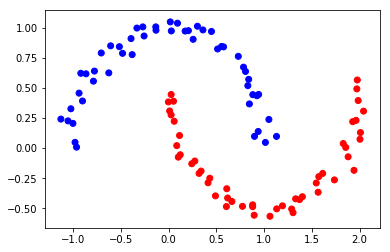

In [9]:
plt.scatter(noisy_moons[:,0], noisy_moons[:,1], c=dbscan_c, cmap='bwr')

In [10]:
#DBSCAN 聚类算法 scikit-learn 实现
from sklearn.cluster import DBSCAN

dbscan_sk = DBSCAN(eps=0.5, min_samples=5, metric='euclidean')
dbscan_sk_c = dbscan_sk.fit_predict(noisy_moons)
dbscan_sk_c

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0], dtype=int64)

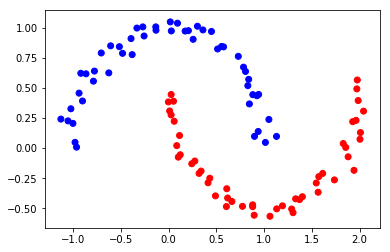

In [11]:
plt.scatter(noisy_moons[:,0], noisy_moons[:,1], c=dbscan_sk_c, cmap='bwr')

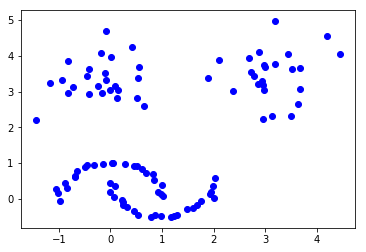

In [12]:
#DBSCAN 与 HDBSCAN 聚类对比
moons, _ = datasets.make_moons(n_samples=50, noise=0.05, random_state=10)
blobs, _ = datasets.make_blobs(n_samples=50, centers=[(-0.25,3.25), (3, 3.5)], cluster_std=0.6, random_state=10)

noisy_moons_blobs = np.vstack([moons, blobs])
plt.scatter(noisy_moons_blobs[:,0], noisy_moons_blobs[:,1], color='b')

In [13]:
dbscan_sk_c = dbscan_sk.fit_predict(noisy_moons_blobs)
dbscan_sk_c

array([ 0,  1,  0,  0,  0,  1,  1,  0,  1,  1,  0,  1,  0,  0,  1,  1,  0,
        0,  1,  0,  1,  1,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  0,  0,
        1,  1,  0,  1,  0,  0,  0,  1,  0,  0,  0,  0,  1,  1,  0,  1, -1,
        2, -1,  2,  2, -1,  3,  3,  3,  2,  3, -1,  3,  2,  3,  2, -1,  2,
        2, -1,  2,  3,  3,  2, -1, -1,  3, -1,  3,  2, -1,  3, -1,  3,  2,
        3,  3, -1,  2, -1, -1,  2,  3,  3, -1, -1, -1,  3,  3,  3],
      dtype=int64)

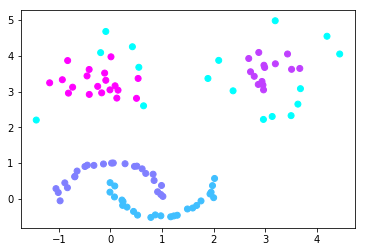

In [14]:
plt.scatter(noisy_moons_blobs[:,0], noisy_moons_blobs[:,1], c=dbscan_sk_c, cmap='cool')

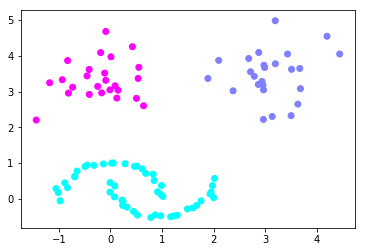

In [15]:
dbscan_sk = DBSCAN(eps=1, min_samples=5, metric='euclidean')
dbscan_sk_c = dbscan_sk.fit_predict(noisy_moons_blobs)
plt.scatter(noisy_moons_blobs[:,0], noisy_moons_blobs[:,1], c=dbscan_sk_c, cmap='cool')

In [16]:
# 运行安装 hdbscan 模块
!pip install hdbscan==0.8.13

You are using pip version 9.0.3, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


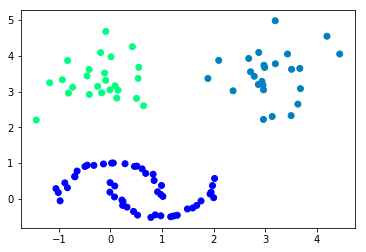

In [17]:
import hdbscan

hdbscan_m = hdbscan.HDBSCAN(gen_min_span_tree=True) # gen_min_span_tree 参数为下文绘图做准备
hdbscan_m_c = hdbscan_m.fit_predict(noisy_moons_blobs)

plt.scatter(noisy_moons_blobs[:,0], noisy_moons_blobs[:,1], c=hdbscan_m_c, cmap='winter')

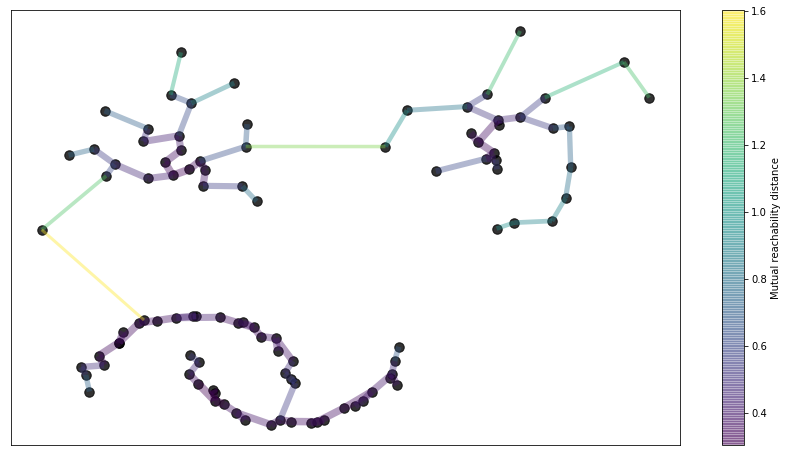

In [18]:
#HDBSCAN 算法流程 [选学]
plt.figure(figsize=(15,8))
hdbscan_m.minimum_spanning_tree_.plot(edge_cmap='viridis', 
                                      edge_alpha=0.4, 
                                      node_size=90, 
                                      edge_linewidth=3)

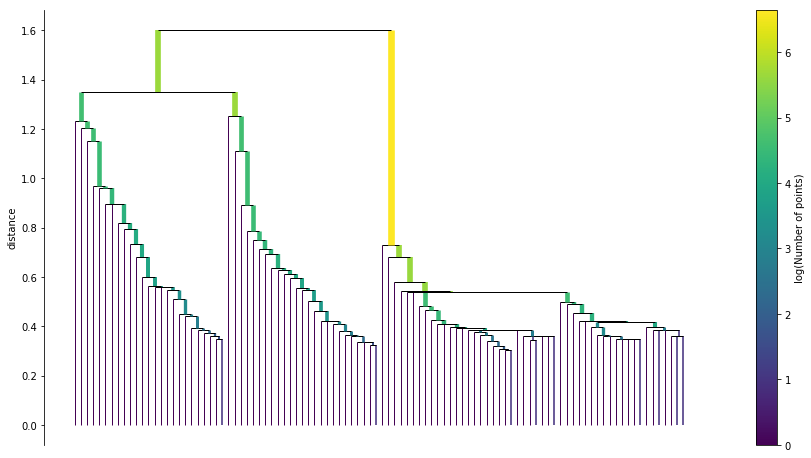

In [19]:
plt.figure(figsize=(15,8))
hdbscan_m.single_linkage_tree_.plot(cmap='viridis', colorbar=True)

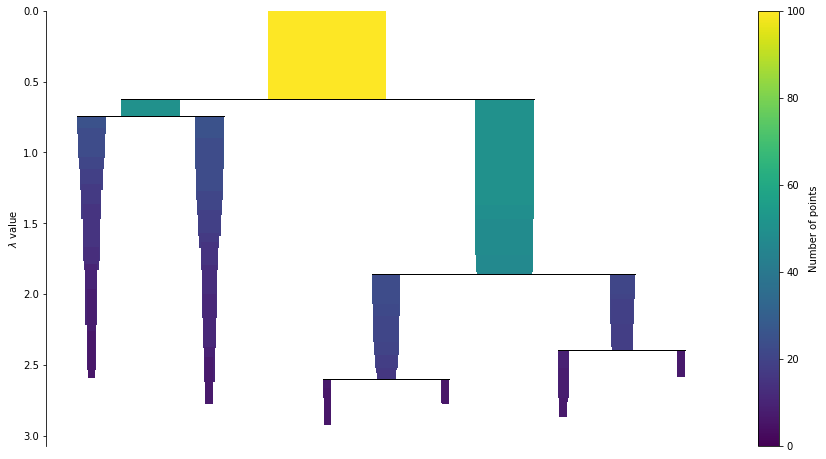

In [20]:
plt.figure(figsize=(15,8))
hdbscan_m.condensed_tree_.plot()

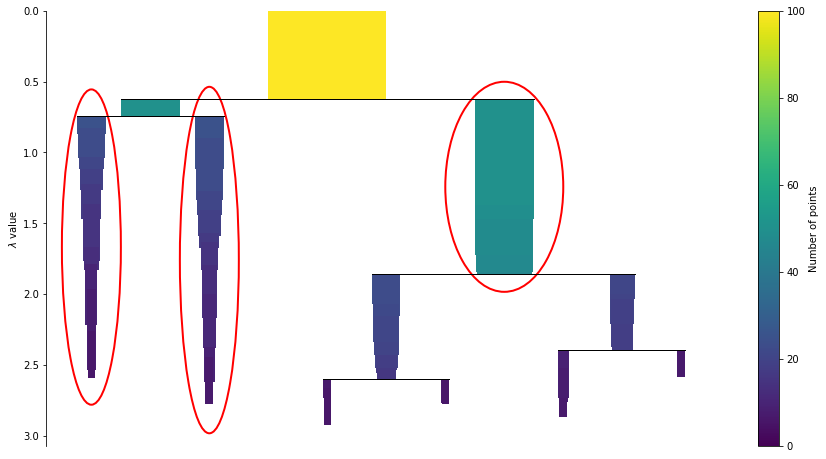

In [21]:
plt.figure(figsize=(15,8))
hdbscan_m.condensed_tree_.plot(select_clusters=True)